# Introdução 

# 1. Carregando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

Abaixo, estou utilizando funções que irão me ajudar a escrever menos códigos, para que assim minhas análises sejam mais eficientes.

In [2]:
def cat_vs_target(rh, column):
    
    temp = rh.groupby(column)["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100

    temp = temp.sort_values(by='Yes', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 4))  
    temp.plot(kind='bar', stacked=False, colormap='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.get_legend().remove()
    
    plt.title('Atrito por ' + column)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center')
        
    contingency_table = pd.crosstab(rh['Attrition'], rh[column])
    chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
    print(f'Chi squared score: {chi2}')
    print(f'p_value: {p}')

# 2. Carregando Dataset

In [3]:
rh = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
rh.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Buscamos se há algum valor nulo nos registros.

In [7]:
duplicates_row = rh[rh.duplicated()]

In [8]:
print(duplicates_row)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


Buscamos por valores duplicados.

In [9]:
rh.shape

(1470, 35)

# 3. Análise Univariada

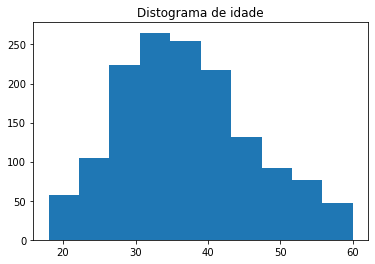

In [10]:
_ = plt.hist(rh.Age)
_ = plt.title("Distograma de idade")

In [11]:
sns.set(style="whitegrid")

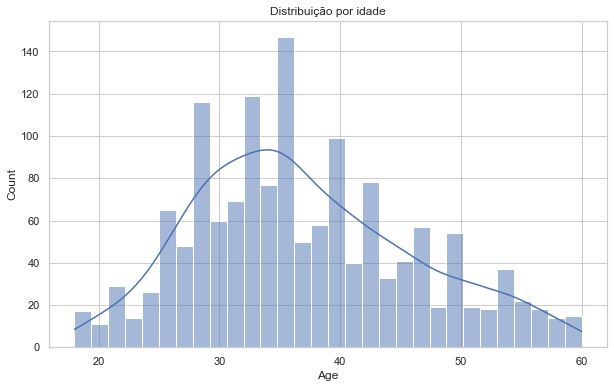

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=rh, x="Age", bins=30, kde=True)
plt.title("Distribuição por idade")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Observa-se uma que uma maior concentração de funcionarios estão entre 30~40 anos

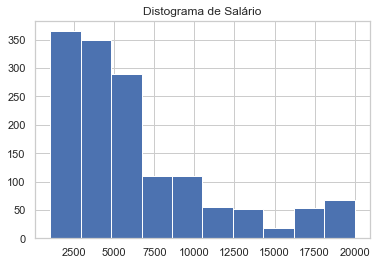

In [13]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title("Distograma de Salário")

Uma base salárial majoritária entre 2000 a 5000, o que é normal, levando em conta que menos pessoas recebem salários altos.

In [14]:
rh.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [15]:
rh.Gender.value_counts(1)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

60% dos funcionários são homens e 40% dos funcionários são mulheres. Por ser uma empresa que contrata muitas pessoas da área de STEM é esperado que tenhamos mais funcionários homens.

In [16]:
rh.EducationField.value_counts(1)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

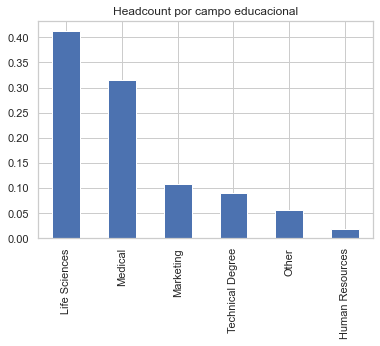

In [17]:
_ = rh.EducationField.value_counts(1).plot.bar()
_ = plt.title("Headcount por campo educacional")

Oberva-se que a maioria dos funcionários é formado na área de Life Sciences. Na sequência, temos muitos funcionários da área Medical. A área com menos funcionários formados é a de Human Resourses.

<AxesSubplot:xlabel='Department', ylabel='Count'>

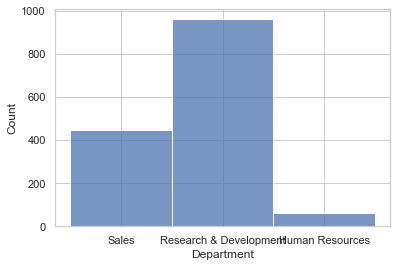

In [18]:
sns.histplot(rh['Department'])

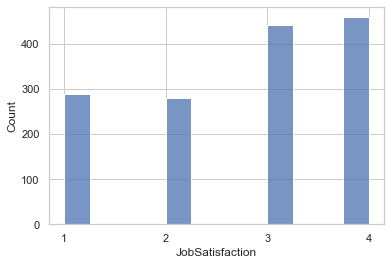

In [19]:
sns.histplot(rh['JobSatisfaction'])
plt.xticks([1,2,3,4]);

Os niveis de satisfação dos funcionarios da IBM estão altos.

# 4. Análise Bivariada

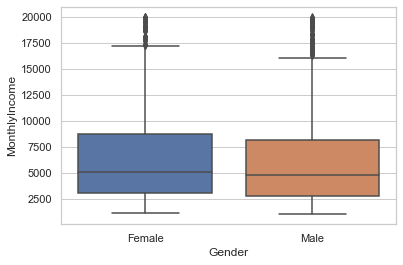

In [20]:
_ = sns.boxplot(x= 'Gender', y='MonthlyIncome', data=rh)

Aqui ultilizamos o boxplot para fazer uma comparação entre gênero e salário. Curiosamente a distribuição salarial entre homens e mulheres é bem parecida. Normalmente, espera-se encontrar salários mais altos para homens. Porém, no caso da IBM, o gender gap parece não ocorrer.

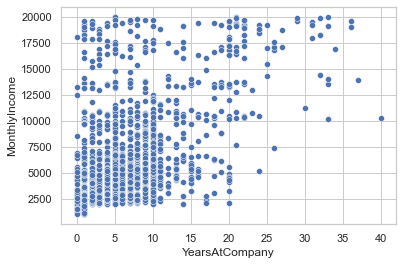

In [21]:
_ = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data = rh)

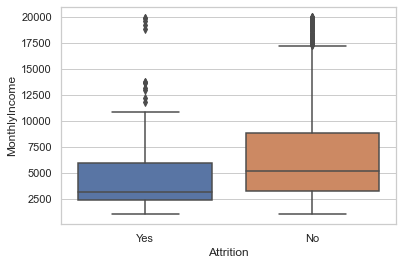

In [22]:
_ = sns.boxplot(x= 'Attrition', y='MonthlyIncome', data=rh)

Podemos observar que os funcionários com maior salário tendem a ficar na empresa. Com isso, temos a certeza de que o salário influencia na taxa de desligamento dos funcionários.

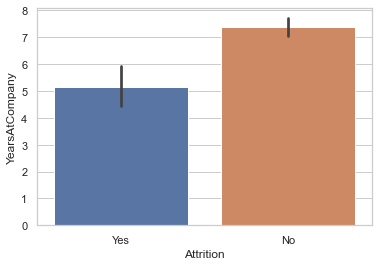

In [23]:
_ = sns.barplot(x= 'Attrition', y='YearsAtCompany', data=rh)

Funcionários que estão a mais tempo na empresa são menos propícios a sair.

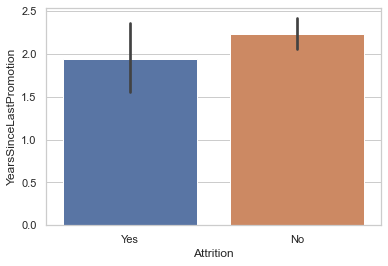

In [24]:
_ = sns.barplot(x= 'Attrition', y='YearsSinceLastPromotion', data=rh)

Surpreendentemente, o tempo desde a última promoção não influencia na saída dos funcionários.

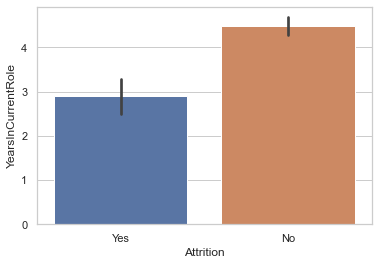

In [25]:
_ = sns.barplot(x= 'Attrition', y='YearsInCurrentRole', data=rh)

Pessoas que estão há muito tempo no seu cargo atual, tendem a ficar ainda mais e não sair.

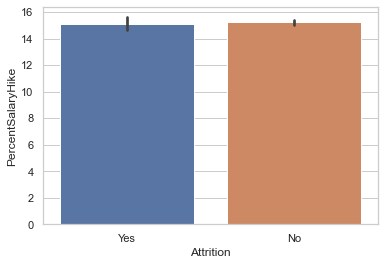

In [26]:
_ = sns.barplot(x= 'Attrition', y='PercentSalaryHike', data=rh)

Aumento na % do salario não mantem o funcionário na empresa.

Chi squared score: 15.146451478483337
p_value: 0.01914772986009514


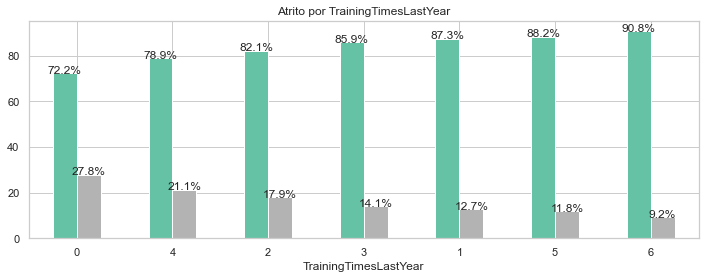

In [27]:
cat_vs_target(rh,'TrainingTimesLastYear')

Funcionários que receberam menos treinamentos tendem a deixar mais a empresa. Apontando que investir no funcionário traz longevidade à carreira na empresa.

In [28]:
rh.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# 4. Análise Multivariável

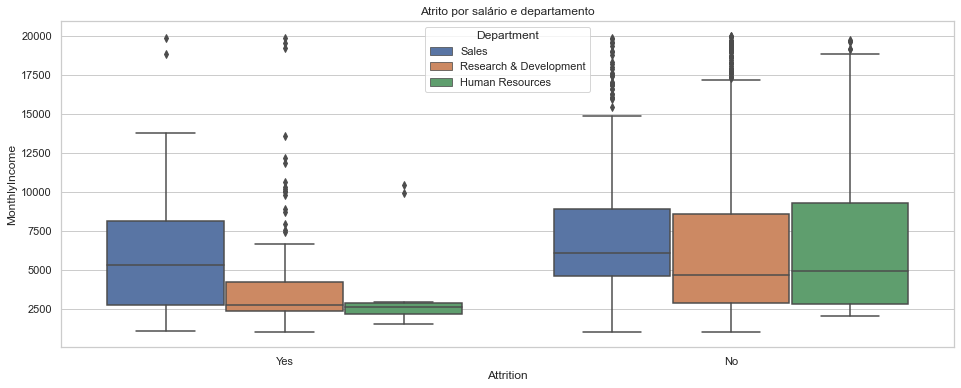

In [29]:
plt.figure(figsize=(16,6))
sns.boxplot(data=rh,x='Attrition',y='MonthlyIncome',hue='Department')
plt.title('Atrito por salário e departamento');

A média salarial das mulheres que saíram da empresa é aparentemente menor do que a dos homens. Essa pode ser uma das razões para elas saírem.

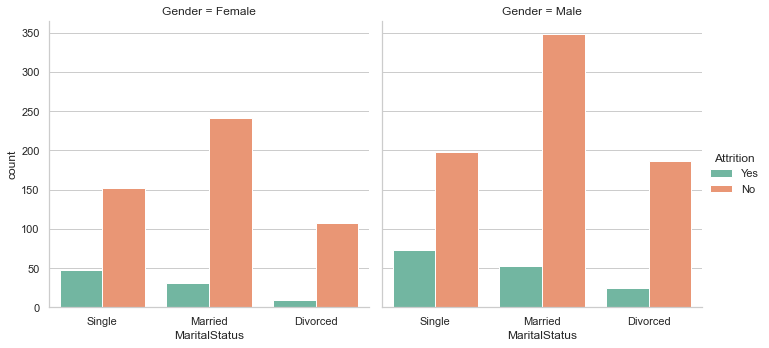

In [30]:
sns.catplot(data=rh, kind='count', x='MaritalStatus', hue='Attrition', col='Gender', palette='Set2');

Aqui observamos que as mulheres divorciadas têm muito menos tendencia a largar seu trabalho atual, ao contrário dos homens.

# Conclusão

- Podemos dizer com segurança que idade, satisfação no trabalho, salário, estado civil, departamento, anos na empresa e anos na função atual desempenham um enorme impacto no desligamento dos funcionários.

- Além disso, o género, a percentagem de aumento salarial e as classificações de desempenho não têm impacto significativo na decisão dos funcionários de deixar a empresa.

# Recomendações para reduzir a taxa de desligamentos de funcionarios

 - Trabalhe no nível de satisfação dos seus funcionários para que seja pelo menos ‘Médio’, quanto maior a satisfação mais funcionários ficam.

- Funcionários com menos de 35 anos são mais propensos a sair. 

 - Aumentar o salário mínimo mensal para pelo menos $3.500 , assim se tornando mais atrativo e como menos probabilidades do funcionário receber propostas maiores.

 - Funcionários solteiros têm mais taxas de desligamentos. ter dependentes familiares pode influenciar em manter o funcionario na empresa.

 - É preciso prestar mais atenção aos funcionários dos departamentos de Vendas e RH, pois eles tendem a sair com mais frequência do que os de P&D.

- Se um funcionário permanecer por mais de 3 anos em sua função atual, provavelmente não irá sair tão cedo da empresa.

- Certifique-se de incluir todos os funcionários em pelo menos 1 treinamento por ano, pois os funcionários que não recebem treinamento tendem a deixar a empresa.